Case de IA


-lugares com preço de combustivel mais alto vende mais ou menos?
feriado vende mais ou menos?
Lugares com maior indice de desemprego - pessoas compram menos


1. Entendimento do problema
a. Qual é o problema? Qual a causa (ou possível causa)?
b. Por que resolver?
c. Qual pode ser uma boa métrica para avaliação do sucesso?
2. Entendimento dos dados
a. Quais os dados disponíveis e que informações podemos tirar deles?
b. Qual a variável target?
3. Pré-processamento
a. Limpeza de dados
b. Criação de outras variáveis
c. Normalização
d. Padronização
e. Lidar com outliers
f. Valores faltantes
4. Modelagem
a. Seleção, treinamento e teste de um algoritmo
b. Tunagem de hiperparâmetros
c. Documentar motivo da escolha
5. Avaliação
a. Analisar as métricas
b. Formular hipóteses de como o seu modelo poderia melhorar e iterar
(documentar essas hipóteses

1. Importando Bibliotecas


In [342]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

2. Limpeza e Tratamento Dados


In [343]:
sales=pd.read_csv('sales data-set.csv')
stores=pd.read_csv('stores data-set.csv')
features=pd.read_csv('features data set.csv')

In [344]:
#df de sales
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [345]:
#merge na stores e sales pelo store
df=pd.merge(sales,stores,on='Store',how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315


In [346]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [347]:
#merge na features
df=pd.merge(df,features,on=['Date','Store','IsHoliday'],how='inner')
df.tail(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,93,26/10/2012,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,26/10/2012,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,26/10/2012,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,26/10/2012,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421569,45,98,26/10/2012,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [348]:
#dropou linhas
df.isna()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421568,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [349]:
#não faz sentido ter info do tamanho da loja 
#já que o A é para lojas grandes e o B para lojas pequenas
#vamos doprar essa coluna
df.drop(columns='Size',inplace=True)
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,93,26/10/2012,2487.80,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,26/10/2012,5203.31,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,26/10/2012,56017.47,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,26/10/2012,6817.48,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421569,45,98,26/10/2012,1076.80,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [350]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [351]:
df.head(1000)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,72,07/05/2010,39104.10,False,A,72.55,2.835,NaN,NaN,NaN,NaN,NaN,210.339968,7.808
996,1,74,07/05/2010,11805.33,False,A,72.55,2.835,NaN,NaN,NaN,NaN,NaN,210.339968,7.808
997,1,78,07/05/2010,12.00,False,A,72.55,2.835,NaN,NaN,NaN,NaN,NaN,210.339968,7.808
998,1,79,07/05/2010,44039.92,False,A,72.55,2.835,NaN,NaN,NaN,NaN,NaN,210.339968,7.808


In [288]:
#criar colunas de mês e ano
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


In [360]:
#ver se temos que tirar outliers ou nao
# Contar linhas com NaN usando isna()
total_linhas_com_nan = df.isna().any(axis=1).sum()

# Exibir o número total de linhas com NaN
#total_linhas_com_nan = len(linhas_com_nan[linhas_com_nan > 0])
total_linhas=len(df)
porc=round((total_linhas_com_nan/total_linhas)*100,2)
print(f"Número de linhas com NaN: {total_linhas_com_nan}, a porcentagem: {porc}%")

Número de linhas com NaN: 324514, a porcentagem: 76.98%


In [359]:
total_linhas_com_nan = df.isna().any(axis=1).sum()
print(total_linhas_com_nan)

324514


Como temos mais que 76% dos dados tem Nan não vamos dropar essas linhas


3. Análise

In [289]:
#tem até 99 tipos de departamentos - a loja de store 1, pode ser do departamento 1,2,3,..., ou 99
df['Dept'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65], dtype=int64)

In [290]:
#só 2010,11,12
df['Year'].unique()

array([2010, 2011, 2012])

In [291]:
#45 ids de lojas
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [292]:
df[(df['Store']==1)&(df['Dept']==1)]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month
0,1,1,2010-02-05,24924.50,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2
73,1,1,2010-02-12,46039.49,True,A,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2
145,1,1,2010-02-19,41595.55,False,A,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2
218,1,1,2010-02-26,19403.54,False,A,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2
290,1,1,2010-03-05,21827.90,False,A,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,1,1,2012-09-28,18947.81,False,A,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.981658,6.908,2012,9
9956,1,1,2012-10-05,21904.47,False,A,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,223.181477,6.573,2012,10
10028,1,1,2012-10-12,22764.01,False,A,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,223.381296,6.573,2012,10
10101,1,1,2012-10-19,24185.27,False,A,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,223.425723,6.573,2012,10


In [293]:
#tirar date
df_without_date=df.drop(columns=['Date','Type']) 


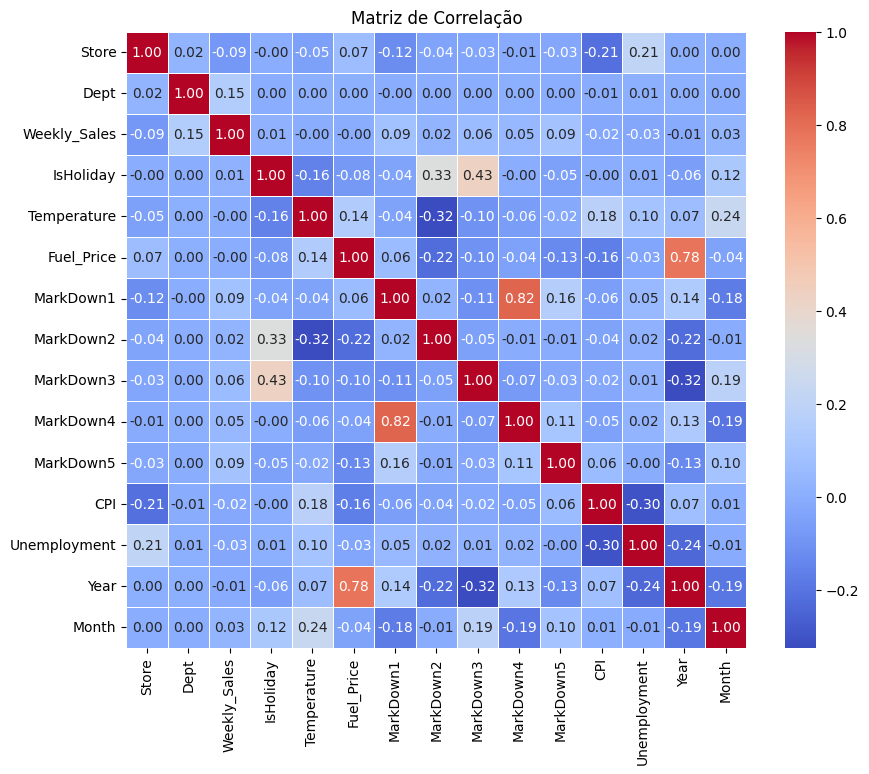

In [294]:
#correlação
correlacao = df_without_date.corr()

# Cria um mapa de calor (heatmap) usando o Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

correlação maior entre o preço do combustível e o ano

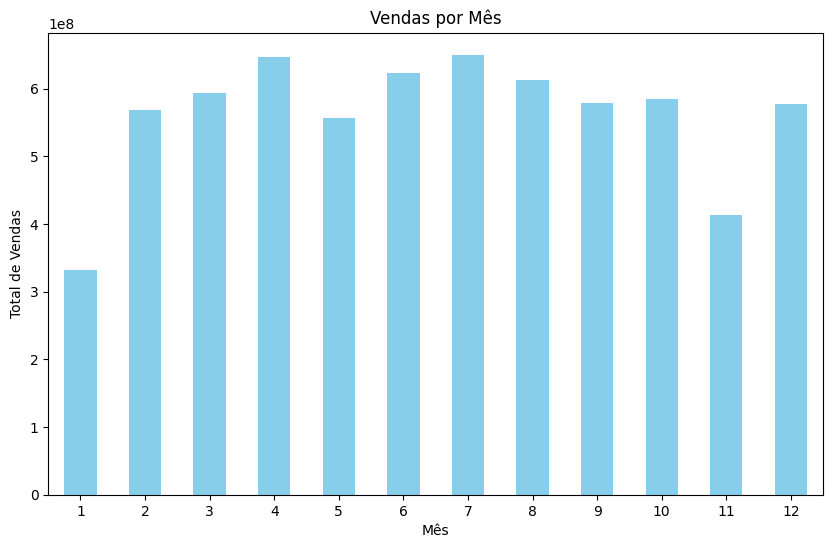

In [295]:
#vamo ver qual mês tem mais vendas semanais
vendas_por_mes = df.groupby('Month')['Weekly_Sales'].sum()

# Crie o gráfico de colunas
plt.figure(figsize=(10, 6))
vendas_por_mes.plot(kind='bar', color='skyblue')
plt.title('Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()

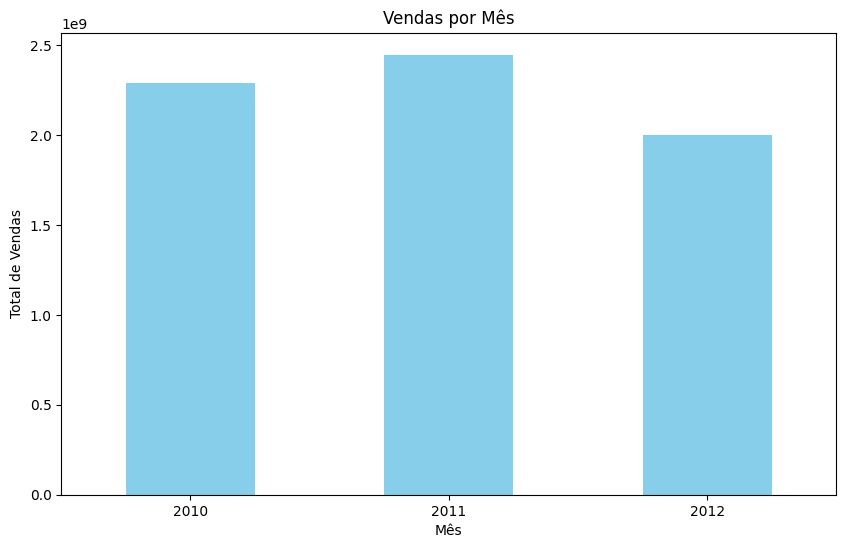

In [296]:
#vamo ver qual ano tem mais vendas semanais
vendas_por_mes = df.groupby('Year')['Weekly_Sales'].sum()

# Crie o gráfico de colunas
plt.figure(figsize=(10, 6))
vendas_por_mes.plot(kind='bar', color='skyblue')
plt.title('Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()

In [297]:
#diferença da média de venda quando é feriado ou não
media_por_feriado = df.groupby('IsHoliday')['Weekly_Sales'].mean()

# Exiba os resultados
print(media_por_feriado)

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64


In [298]:
#quais são os feriados que tem?
feriados = df[df['IsHoliday'] == True][['Date','Weekly_Sales']]


In [299]:
#qual feriado que vende mais?
vendas_por_feriado = feriados.groupby('Date')['Weekly_Sales'].sum()

feriado_mais_vendido = vendas_por_feriado.idxmax()
vendas_mais_altas = vendas_por_feriado.max()

In [300]:
print(vendas_mais_altas)

66593605.26


In [301]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month
0,1,1,2010-02-05,24924.50,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2
1,1,2,2010-02-05,50605.27,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2
2,1,3,2010-02-05,13740.12,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2
3,1,4,2010-02-05,39954.04,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2
4,1,5,2010-02-05,32229.38,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2


In [302]:
#pq inflação e desemprego não tiveram impacto na weekly_sales


In [303]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Year                     int32
Month                    int32
dtype: object

In [304]:
#antes de lidar com a normalizaçao e padronização - vamos lidar com as variáveis categóricas
#Date,isholiday(is,not),type(ABC)
df_dummies=pd.get_dummies(df[['IsHoliday','Type']])

In [305]:
df_dummies=df_dummies.astype(int)

In [306]:
df.drop(columns=['Type','IsHoliday'],inplace=True)

In [307]:
df=pd.concat([df,df_dummies],axis=1)

In [308]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,IsHoliday,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0
3,1,4,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0
4,1,5,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0


In [309]:
df_sem_data = df.drop(columns=['Date']).copy()

In [310]:
df_sem_data.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,IsHoliday,Type_A,Type_B,Type_C
0,1,1,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0
1,1,2,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0
2,1,3,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0
3,1,4,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0
4,1,5,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0


In [273]:
#preencher valores nulos
#Preencher valores nulos com a média, mediana, etc.
#df_sem_data = df_sem_data.fillna(df_sem_data.mean()) 
# Remover linhas com valores nulos
#df_sem_nulos = df_sem_data.dropna()

Usar normalização ou padronização?(MinMaxScaler/StandardScaler)
normalização: if your data has outliers or does not follow a normal distribution, MinMaxScaler

Normalização:

Objetivo: Colocar os dados em uma escala comum, geralmente entre 0 e 1.
Como é feita: Cada valor é transformado de forma que fique entre 0 e 1, com base nos valores mínimo e máximo da coluna
 
Scikit-learn: MinMaxScaler é uma implementação comum para normalização.

Padronização:

Objetivo: Transformar os dados para que tenham uma média zero e um desvio padrão de um.
Como é feita: Cada valor é transformado subtraindo-se a média da coluna e dividindo pelo desvio padrão.
Scikit-learn: StandardScaler é uma implementação comum para padronização.

Text(0.5, 1.0, 'Histograma Antes da Normalização')

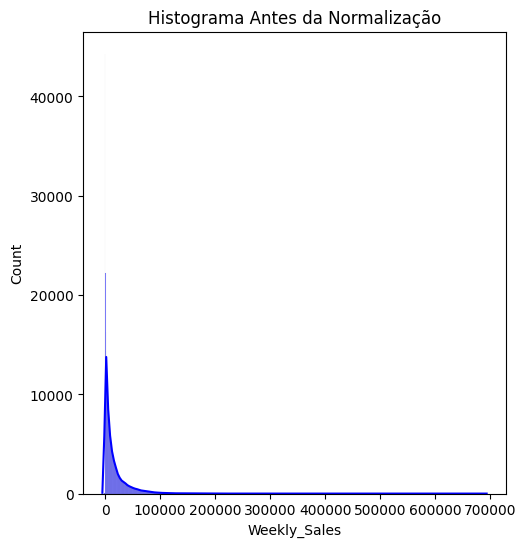

In [316]:
#1. ver a distribuição dos dados se é normal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Weekly_Sales'], kde=True, color='blue', label='Original')
plt.title('Histograma Antes da Normalização')

In [ ]:
#2. ver se tem bastante outliers ou não
#temos alguns jeitos

1. Boxplot:
O boxplot é uma visualização gráfica que representa a distribuição estatística dos dados.  
Outliers geralmente aparecem como pontos fora das "linhas de bigode" do boxplot.

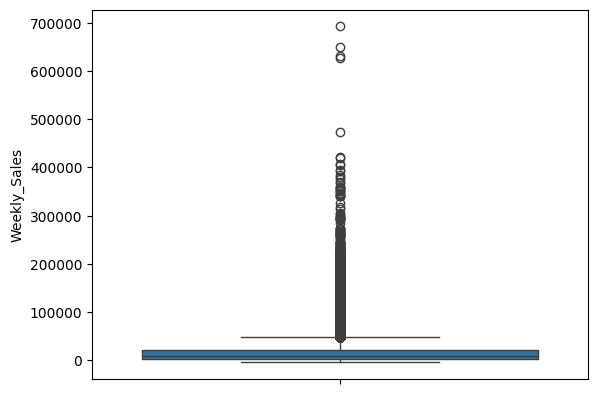

In [319]:
sns.boxplot(y=df['Weekly_Sales'],data=df)
plt.show()

2. Histograma:  
Um histograma pode ajudar a identificar a distribuição dos dados.  
Outliers podem se manifestar como barras isoladas longe da massa principal.

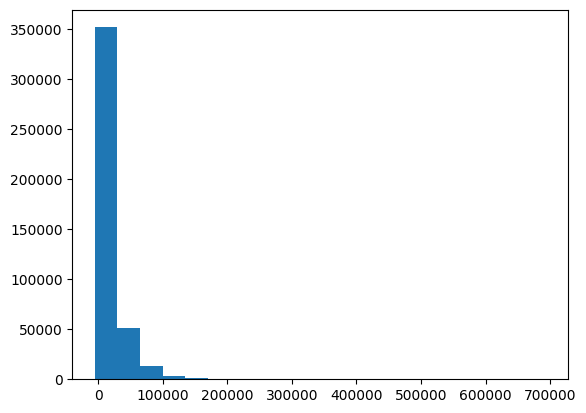

In [320]:
plt.hist(df['Weekly_Sales'],bins=20)
plt.show()

3. Scatter Plot:  
Em um scatter plot, pontos que se afastam do padrão podem ser outliers.  
Especialmente útil em dados bidimensionais.  

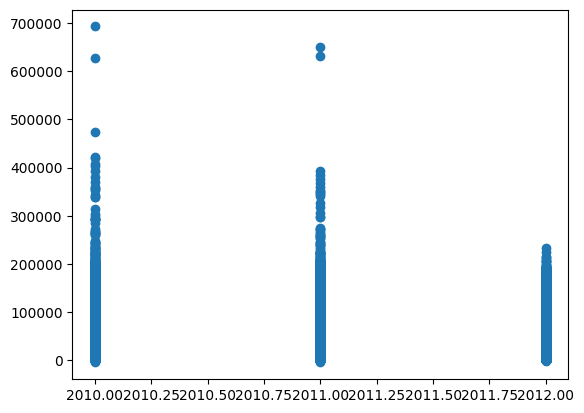

In [328]:
# Criar scatter plot
plt.scatter( df['Year'],df['Weekly_Sales'])
plt.show()
#nao mt bom para quando há mts dados

4. Z-Score:  
Calcular o Z-Score pode ajudar a identificar pontos que estão longe da média em termos de desvios padrão.

O Z-Score é uma medida estatística que indica o quão longe um ponto de dados está da média de um conjunto de dados em termos de desvios padrão. Em outras palavras, o Z-Score mede quantos desvios padrão um ponto de dados específico está da média da distribuição.

A fórmula para calcular o Z-Score de um ponto de dados 
X em um conjunto de dados com média μ e desvio padrão σ é dada por:

Z=(X-μ)/σ

Z: Z-Score do ponto de dados.
X: Valor do ponto de dados.
μ: Média do conjunto de dados.
σ: Desvio padrão do conjunto de dados.
A interpretação do Z-Score é a seguinte:

Se Z=0, o ponto de dados está exatamente na média.
Se Z>0, o ponto de dados está acima da média.
Se Z<0, o ponto de dados está abaixo da média.
Para identificar outliers usando o Z-Score, uma regra comum é considerar pontos com um Z-Score absoluto maior que um certo limiar como outliers. Um limiar comum é 
Z>3 ou Z<−3, indicando que o ponto de dados está a mais de 3 desvios padrão da média.

Aqui está um exemplo de como você pode usar o Z-Score para identificar outliers em um conjunto de dados em Python:

In [338]:
from scipy.stats import zscore

# Calcular Z-Score
df['zscore'] = zscore(df['Weekly_Sales'])

# Identificar outliers com base no Z-Score
outliers = df[df['zscore'].abs() > 3]

num_outliers=len(outliers)
linhas_df=len(df)
outliers_percent=round((num_outliers/linhas_df)*100,3)

print(f'linhas outliers: {num_outliers}, linhas do df:{linhas_df}, correspondendo a {outliers_percent}%')


linhas outliers: 8848, linhas do df:421570, correspondendo a 2.099%


In [ ]:
df['zscore'].head()

5. IQR (Intervalo Interquartil):  
O IQR é a diferença entre o primeiro quartil (25º percentil) e o terceiro quartil (75º percentil).  
Outliers podem ser identificados com base em uma multiplicação do IQR.  

Ordene seu conjunto de dados dos valores mais baixos para os mais altos;  
Encontre a mediana. Este é o segundo quartil (Q2);  
Em Q2, divida o conjunto de dados ordenado em duas metades.  
O quartil inferior (Q1) é a mediana da metade inferior dos dados.  
O quartil superior (Q3) é a mediana da metade superior dos dados.  
Se o tamanho do conjunto de dados for ímpar, não inclua a mediana ao localizar o primeiro e o terceiro quartis.  
Se o tamanho do conjunto de dados for uniforme, a mediana é a média dos 2 valores do meio no conjunto de dados. Adicione esses 2 valores e, em seguida, divida por 2. A mediana divide o conjunto de dados nas metades inferior e superior e é o valor do segundo quartil (Q2) .  

In [341]:
# Calcular IQR
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers com base no IQR
outliers = df[(df['Weekly_Sales'] < (Q1 - 1.5 * IQR)) | (df['Weekly_Sales'] > (Q3 + 1.5 * IQR))]

#print(outliers)
num_outliers=len(outliers)
linhas_df=len(df)
outliers_percent=round((num_outliers/linhas_df)*100,3)

print(f'linhas outliers: {num_outliers}, linhas do df:{linhas_df}, correspondendo a {outliers_percent}%')



linhas outliers: 35521, linhas do df:421570, correspondendo a 8.426%


In [364]:
#pq desses outliers? o que tinha de diferente
print(outliers['Date'].unique())

<DatetimeArray>
['2010-02-05 00:00:00', '2010-02-12 00:00:00', '2010-02-19 00:00:00',
 '2010-02-26 00:00:00', '2010-03-05 00:00:00', '2010-03-12 00:00:00',
 '2010-03-19 00:00:00', '2010-03-26 00:00:00', '2010-04-02 00:00:00',
 '2010-04-09 00:00:00',
 ...
 '2012-08-24 00:00:00', '2012-08-31 00:00:00', '2012-09-07 00:00:00',
 '2012-09-14 00:00:00', '2012-09-21 00:00:00', '2012-09-28 00:00:00',
 '2012-10-05 00:00:00', '2012-10-12 00:00:00', '2012-10-19 00:00:00',
 '2012-10-26 00:00:00']
Length: 143, dtype: datetime64[ns]


In [322]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,IsHoliday,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0
3,1,4,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0
4,1,5,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,0,1,0,0


Constatou-se que não é normal - vamos usar a normalização
Características da distribuição normal:

Simetria: A distribuição normal é simétrica em relação à sua média. Isso significa que metade dos dados está à esquerda da média e metade está à direita.

Média, Mediana e Moda iguais: Na distribuição normal, a média, mediana e moda são iguais e coincidem no ponto mais alto da curva.

Curva em forma de sino: A curva da distribuição normal é mais alta no centro e diminui suavemente em direção às extremidades, formando uma forma de sino.

Desvio Padrão: O desvio padrão controla a dispersão dos dados em relação à média. Um desvio padrão maior indica que os dados são mais dispersos em relação à média.

68-95-99.7 Rule (Regra 68-95-99.7): Esta regra empírica afirma que aproximadamente 68% dos dados estão dentro de um desvio padrão da média, 95% dentro de dois desvios padrão e 99.7% dentro de três desvios padrão.

In [317]:
#normalização
# Criar o objeto MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a normalização e converter a matriz resultante de volta para um DataFrame
df_normalizado = pd.DataFrame(scaler.fit_transform(df_sem_data), columns=df_sem_data.columns)

# Exibir estatísticas descritivas do DataFrame normalizado
print(df_normalizado.describe())

               Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean        0.481831       0.441432       0.030039       0.608122   
std         0.290575       0.311143       0.032533       0.180508   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.227273       0.173469       0.010126       0.476908   
50%         0.477273       0.367347       0.018051       0.627691   
75%         0.727273       0.744898       0.036091       0.746967   
max         1.000000       1.000000       1.000000       1.000000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  150681.000000  111248.000000  137091.000000   
mean        0.445404       0.081742       0.034360       0.010367   
std         0.229717       0.093531       0.090426       0.067931   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.230962       0.0252

Ver a diferença antes e depois da normalização e padronização


In [312]:
print(df_sem_data.describe())

               Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  150681.000000  111248.000000  137091.000000   
mean        3.361027    7246.420196    3334.628621    1439.421384   
std         0.458515    8291.221345    9475.357325    9623.078290   
min         2.472000       0.270000    -265.760000     -29.100000   
25%         2.933000    2240.2700

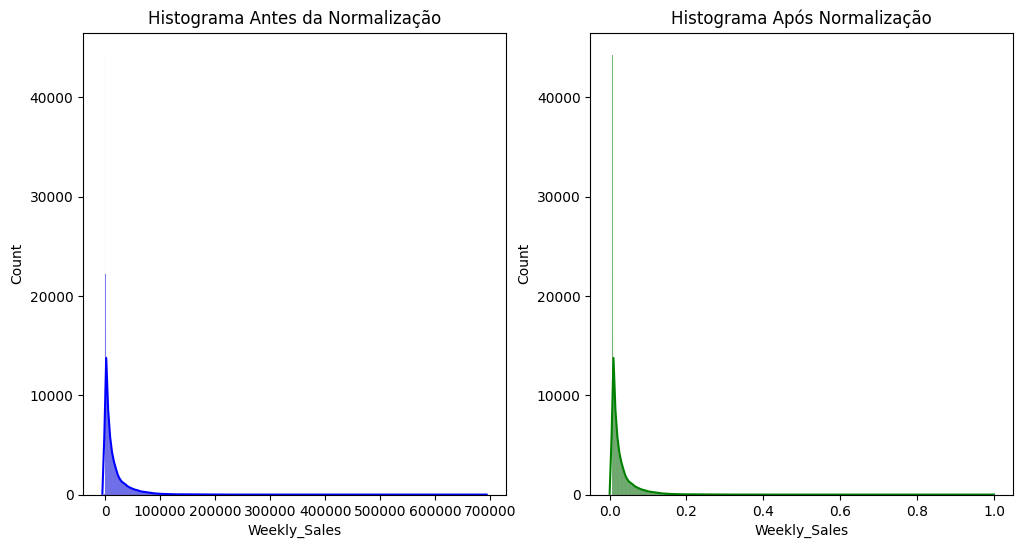

In [361]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_sem_data['Weekly_Sales'], kde=True, color='blue', label='Original')
plt.title('Histograma Antes da Normalização')

plt.subplot(1, 2, 2)
sns.histplot(df_normalizado['Weekly_Sales'], kde=True, color='green', label='Normalizado')
plt.title('Histograma Após Normalização')

plt.show()

In [314]:
#normalização
# Criar o objeto StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Aplicar a normalização e converter a matriz resultante de volta para um DataFrame
df_normalizado = pd.DataFrame(scaler.fit_transform(df_sem_data), columns=df_sem_data.columns)

# Exibir estatísticas descritivas do DataFrame normalizado
print(df_normalizado.describe())

              Store          Dept  Weekly_Sales   Temperature    Fuel_Price  \
count  4.215700e+05  4.215700e+05  4.215700e+05  4.215700e+05  4.215700e+05   
mean  -7.335157e-17 -5.332821e-17 -1.348374e-18 -8.419250e-16  9.266029e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.658199e+00 -1.418742e+00 -9.233435e-01 -3.368949e+00 -1.938930e+00   
25%   -8.760499e-01 -8.612194e-01 -6.121048e-01 -7.269148e-01 -9.335081e-01   
50%   -1.568566e-02 -2.381055e-01 -3.685073e-01  1.084102e-01  1.984094e-01   
75%    8.446786e-01  9.753268e-01  1.860141e-01  7.691897e-01  8.221635e-01   
max    1.783258e+00  1.795214e+00  2.981434e+01  2.170975e+00  2.414263e+00   

          MarkDown1     MarkDown2     MarkDown3     MarkDown4     MarkDown5  \
count  1.506810e+05  1.112480e+05  1.370910e+05  1.349670e+05  1.514320e+05   
mean   5.281408e-18  3.321248e-17  1.534168e-17 -2.067922e-16 -1.021013e-16   
std    1.000003e+00  1.000004e+00  1.000004e+00  1.

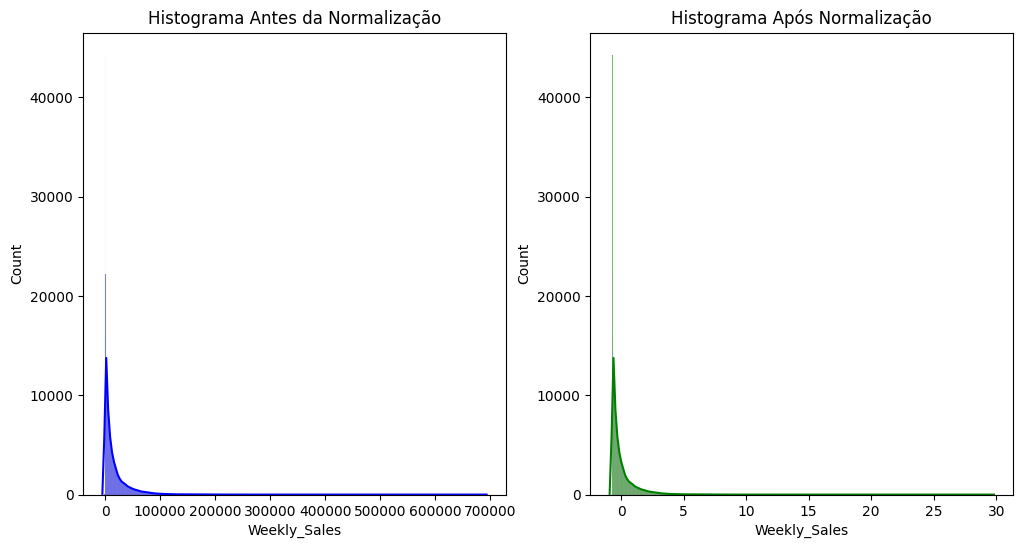

In [315]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_sem_data['Weekly_Sales'], kde=True, color='blue', label='Original')
plt.title('Histograma Antes da Normalização')

plt.subplot(1, 2, 2)
sns.histplot(df_normalizado['Weekly_Sales'], kde=True, color='green', label='Normalizado')
plt.title('Histograma Após Normalização')

plt.show()